In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [ ]:
st_df =pd.read_csv('/content/Students_Performance.csv')

In [ ]:
st_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


## 1. Finding out how many males and females participated in the test?

In [ ]:
gend_class=st_df.gender.groupby ([st_df ['test preparation course'],st_df['gender']]).count().astype(int)

In [ ]:
gend_class

test preparation course  gender
completed                female    184
                         male      174
none                     female    334
                         male      308
Name: gender, dtype: int64

### Inference: Out of the 1000 students only 358 students, i.e. 184 female and 174 male students did the test preparation course.

<Axes: xlabel='test preparation course', ylabel='count'>

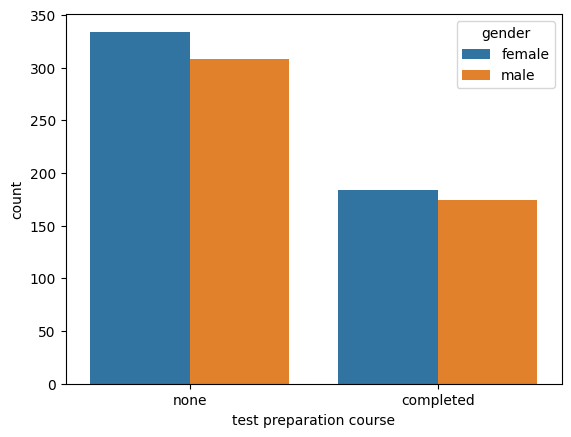

In [ ]:
sns.countplot(x='test preparation course', data=st_df, hue='gender')

## 2. Impact of the students' parental level of education?

In [ ]:
st_df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
ed_lev=st_df.gender.groupby ([st_df ['parental level of education'],st_df['test preparation course']]).count().astype(int)

In [ ]:
ed_lev

parental level of education  test preparation course
associate's degree           completed                   82
                             none                       140
bachelor's degree            completed                   46
                             none                        72
high school                  completed                   56
                             none                       140
master's degree              completed                   20
                             none                        39
some college                 completed                   77
                             none                       149
some high school             completed                   77
                             none                       102
Name: gender, dtype: int64

<Axes: xlabel='parental level of education', ylabel='count'>

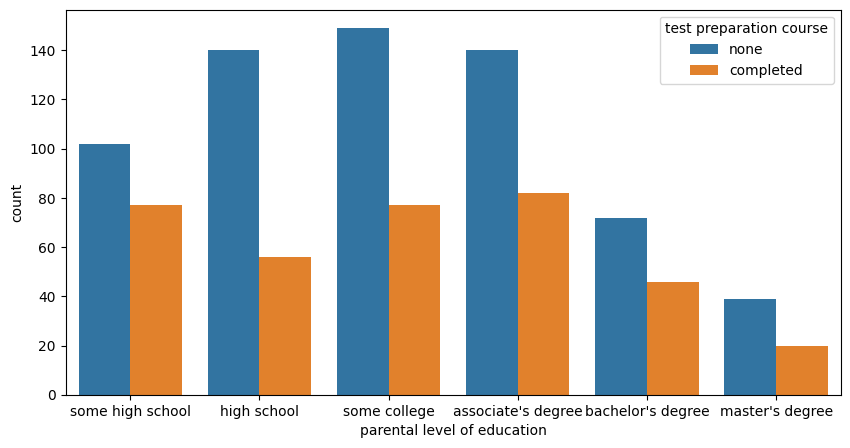

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='parental level of education', data=st_df, hue='test preparation course')

### Inference: Higher parental education does not affect students attending the test preperation course...

## 3. Parental level of education vs Student scores

<Axes: xlabel='parental level of education', ylabel='writing score'>

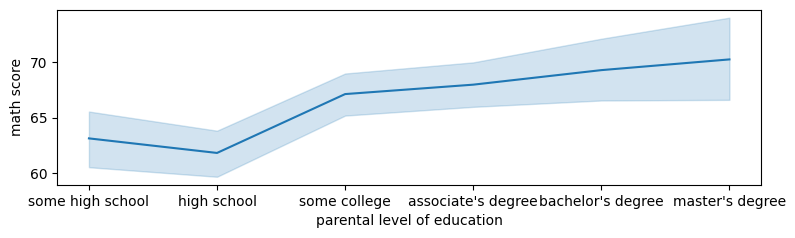

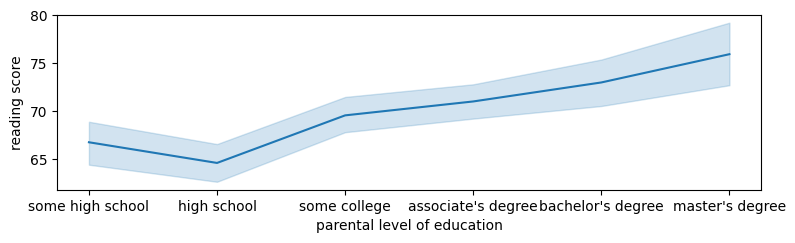

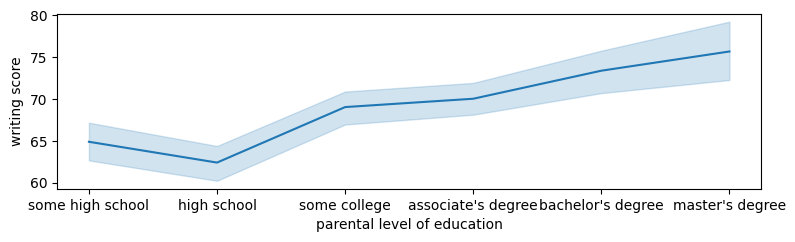

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
sns.lineplot(x='parental level of education', y ='math score', data=st_df)

plt.figure(figsize=(20,5))
plt.subplot(2,2,2)
sns.lineplot(x='parental level of education', y ='reading score', data=st_df)

plt.figure(figsize=(20,5))
plt.subplot(2,2,3)
sns.lineplot(x='parental level of education', y ='writing score', data=st_df)

### Inference: When the level of parental education increases performance of the students is also higher..

## Who scores most based on Gender & Test preparation course?

- Gender

In [ ]:
g_mscore= st_df[["math score", "reading score", "writing score"]].groupby(st_df ["gender"])

In [ ]:
g_mscore_av = g_mscore.mean()

In [ ]:
g_mscore_av

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


### Inference : Scores based on gender shows that female students are good at reading and writing while males are good at math.

- Test preparation course

In [ ]:
t_mscore= st_df[["math score", "reading score", "writing score"]].groupby(st_df ["test preparation course"])

In [ ]:
t_mscore_av = t_mscore.mean()

In [ ]:
t_mscore_av

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


### Scores based on test preparation course shows that students attending test preparation course score perform better than others.

## Scoring variation based on gender & Test preparation course

- Gender

In [ ]:
g_v_score = st_df[["math score", "reading score", "writing score"]].groupby(st_df ["gender"])

In [ ]:
g_vst_score = g_v_score.std()

In [ ]:
g_vst_score

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


### Males score almost consistently in all the subjects with a lower std deviation

- Test preparation course

In [ ]:
tp_v_score = st_df[["math score", "reading score", "writing score"]].groupby(st_df ["test preparation course"])

In [ ]:
tp_vst_score = tp_v_score.std()

In [ ]:
tp_vst_score

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


### Inference : Variation in test scores among those who attended test preapation course and those who did not are almost similar.

## Selecting top 25% of students eligible for bonus based on their math score,

In [ ]:
st_bonus = st_df.nlargest(250, 'math score' , keep='first')

In [ ]:
st_bonus

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


#Case Study on Testing of Hypothesis

Problem:

A company started to invest in digital marketing as a new
way of their product promotions. For that they collected
data and decided to carry out a study on it.

a. The company wishes to clarify whether there is any
increase in sales after stepping into digital marketing.

b. The company needs to check whether there is any
dependency between the features “Region” and
“Manager”.

In [4]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import statistics as stat
 import scipy as sp

In [3]:
sale_df = pd.read_csv('/content/Sales_add.csv')

In [5]:
sale_df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [6]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
sale_df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


### Observations:
a. Average sales data shows that sales has increased by 81,883.78 after implementing digital marketing as a medium for product promotions.


### A. To clarify whether there is any increase in sales after stepping into digital marketing we can carry out one paired samples t-test, especially with a smaller database less than 30 samples.

Hypothesis:

  HO:The sales figure before and after the digital marketing initiative are the same.

  HA:The sales after the digital marketing initiative is more.
  
  Alpha: 0.05

In [27]:
from scipy import stats

In [28]:
sal_bfdm = sale_df['Sales_before_digital_add(in $)']
sal_afdm = sale_df['Sales_After_digital_add(in $)']

In [32]:
results = stats.ttest_rel(sal_bfdm, sal_afdm)

In [38]:
t_val = results.statistic
p_val = results.pvalue

In [39]:
print('t-value is:',t_val)
print('p-value is:',p_val)

t-value is: -12.09070525287017
p-value is: 6.336667004575778e-11


### Inference
1.Null hypothesis is rejected as p-value < 0.05.

2.Alternative hypothesis is true, means the sales after implementing digital marketing has increased.

### B. Is there any dependency between the features “Region” and “Manager”?

For this we can adopt Chi square test and understand the dependency of “Region” and “Manager”.

Hypothesis:

HO : The 2 features “Region” and “Manager” are independent.

HA : The 2 features “Region” and “Manager” are dependent.

Alpha : 0.05

In [55]:
crosstab = pd.crosstab(sale_df["Region"], sale_df["Manager"])
crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [56]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=3.050566893424036, pvalue=0.5493991051158094, dof=4, expected_freq=array([[4.09090909, 3.18181818, 2.72727273],
       [2.86363636, 2.22727273, 1.90909091],
       [2.04545455, 1.59090909, 1.36363636]]))

In [57]:
chi = stats.chi2_contingency(crosstab).statistic
p_val2 = stats.chi2_contingency(crosstab).pvalue
dof = stats.chi2_contingency(crosstab).dof

In [58]:
print('chi square statistic:',chi)
print('pvalue:',p_val2)
print('degrees of freedom:',dof)

chi square statistic: 3.050566893424036
pvalue: 0.5493991051158094
degrees of freedom: 4


Inference:
Considering that p-value is greater than 0.05, null hypothesis cannot be rejected, i.e. the 'region' and 'manager' variables are independent.
